In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Here we are experimenting with different algorithms

      1.K Nearest Neighbour
      2.Random Forest
      3.Decision Tree
      4.Support Vector Machine

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
#Getting information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
output      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Feature Selection

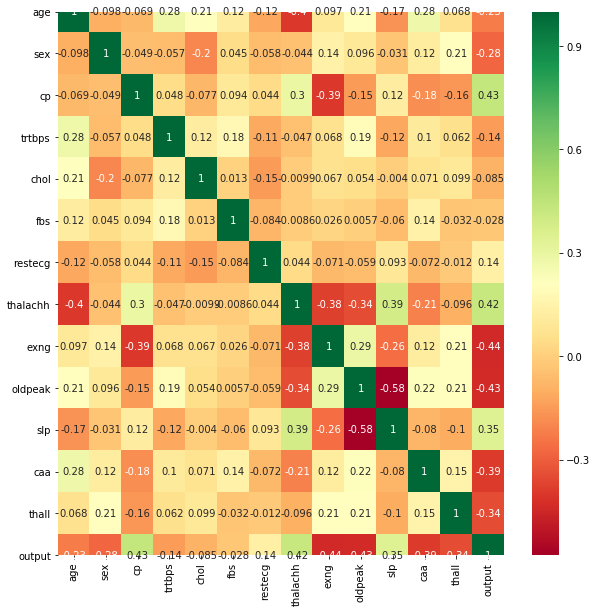

In [6]:
import seaborn as sns
#getting correlations for each feature in dataset
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot= True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DC7337988>,
      dtype=object)

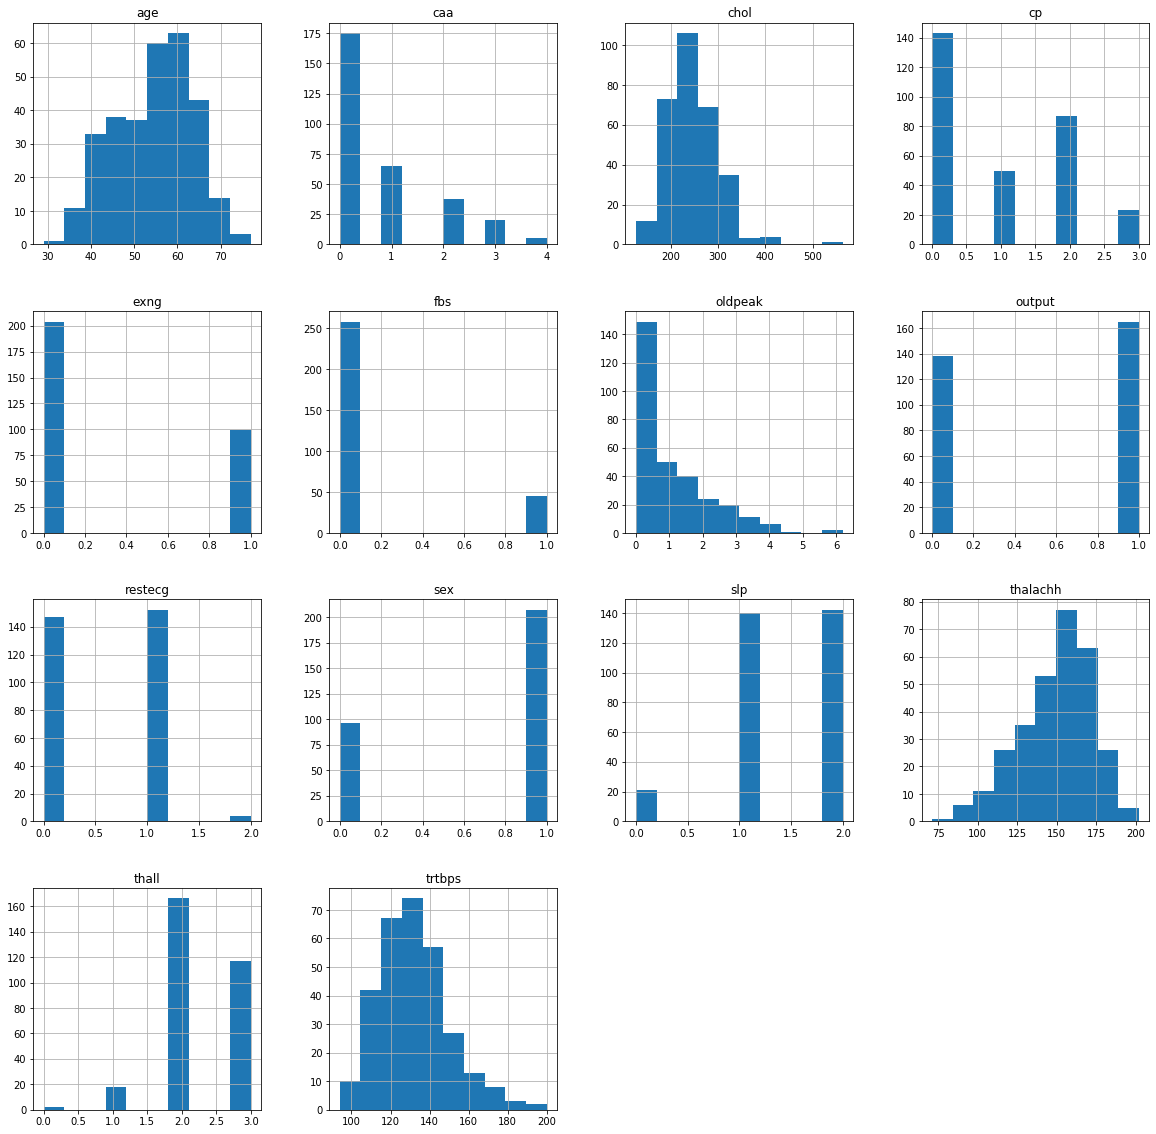

In [7]:
df.hist(figsize=(20,20))

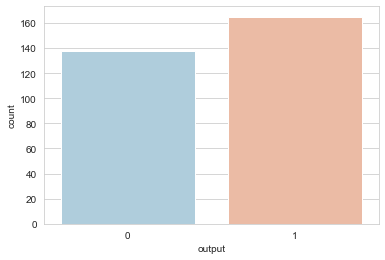

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='output',data=df,palette='RdBu_r')

## Data Preprocessing

In [9]:
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exng','slp','caa','thall'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()
columns_to_scale=['age','trtbps','chol','thalachh','oldpeak']
dataset[columns_to_scale]=standardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
dataset.head()          #below created are dummy variables from sex_0

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [12]:
#creating dependent and independent features 
y=dataset['output']
X=dataset.drop(['output'],axis=1)

## K Nearest Neighbour Classifier

In [13]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'KNN Classifier scores for different k values')

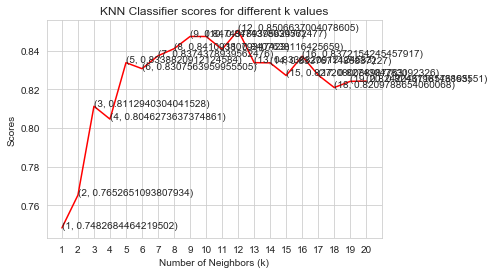

In [14]:
plt.plot([k for k in range(1,21)],knn_scores,color='Red')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Scores')
plt.title('KNN Classifier scores for different k values')

In [15]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [16]:
print("Accuracy of KNN algorithms is:",score.mean())

Accuracy of KNN algorithms is: 0.8506637004078605


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
randomforest_classifier=RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [19]:
print("Accuracy of Random Forest algorithm is:",score.mean())

Accuracy of Random Forest algorithm is: 0.8046347793845013


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)   #we can define the test_size to some value for testing
decTree=DecisionTreeClassifier(max_depth=6,random_state=0)
decTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [22]:
y_pred_decTree=decTree.predict(X_test)
score=accuracy_score(y_test,y_pred_decTree)

In [23]:
print("Accuracy of Decision Tree algorithm is:",score.mean())

Accuracy of Decision Tree algorithm is: 0.75


## Support Vector Machine

In [24]:
from sklearn.svm import SVC
#we are using linear svm
svm_linear=SVC(kernel='linear',C=0.01)     #C can be taken as C=100 also

In [25]:
svm_linear.fit(X_train,y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
#print("Accuracy of SVM(training)is:",svm_linear.score(X_train,y_train))
#print("Accuracy of SVM(testing)is:",svm_linear.score(X_test,y_test))

In [27]:
#print("Accuracy of SVM is:",(svm_linear.score(X_train,y_train)+svm_linear.score(X_test,y_test))/2)

In [28]:
print(svm_linear.score(X_train,y_train))

0.8722466960352423


In [29]:
print(svm_linear.score(X_test,y_test))

0.8289473684210527


SVM got the high accuracy with 86% among KNN,Random Forest,Decision Tree.So SVM is the best accuracy machine learning model in Heart Disease Prediction.